# Allstate Claims Severity

Kaggle challenge

# 1)- Importing key libraries


In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
! pip install version_information

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib,scipy,sklearn

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
numpy 1.16.4
seaborn 0.9.0
matplotlib 3.0.3
scipy 1.3.1
sklearn 0.21.3
Mon Aug 26 12:30:35 2019 UTC

# 2)- Loading data

In [0]:
df_insurance=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_submit=pd.read_csv('sample_submission.csv')

In [7]:
df_insurance.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
df_insurance.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
188313,587620,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
188317,587633,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,B,B,A,B,A,A,A,A,A,A,A,A,A,...,B,D,D,C,E,A,C,T,I,A,A,A,L,H,F,G,G,BI,EG,K,AS,AD,A,O,MJ,0.907272,0.620805,0.440642,0.821574,0.281143,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [9]:
df_insurance.shape

(188318, 132)

In [10]:
df_insurance.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [11]:
df_test.shape

(125546, 131)

In [12]:
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In test set, we do not have our dependant feature i.e loss

### 2a)- Feature Description

In [13]:
df_insurance.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### 2b)-Count features

Only for contineous features

In [0]:
contFeatureslist = []
for colName,x in df_insurance.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [15]:
print(contFeatureslist)

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


### 2c)- Data type

# 3) EDA

In [32]:
print("Number of missing values",df_insurance.isnull().sum().sum())

Number of missing values 0


### 3.1)-Box plots for continuous features

In [0]:
contFeatureslist.remove("id")
contFeatureslist.remove("loss")

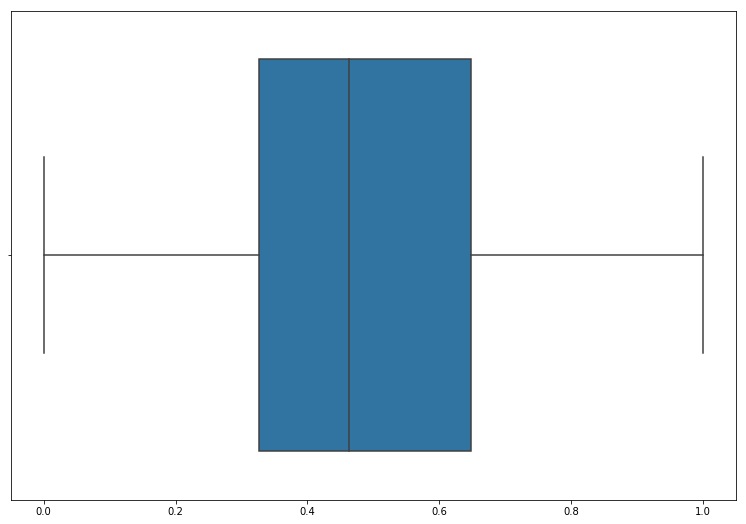

In [17]:
plt.figure(figsize=(13,9))
sns.boxplot(df_insurance[contFeatureslist])

### 3.2)-Correlation between continuous features

In [0]:
# Include  target variable also to find correlation between features and target feature as well
contFeatureslist.append("loss")

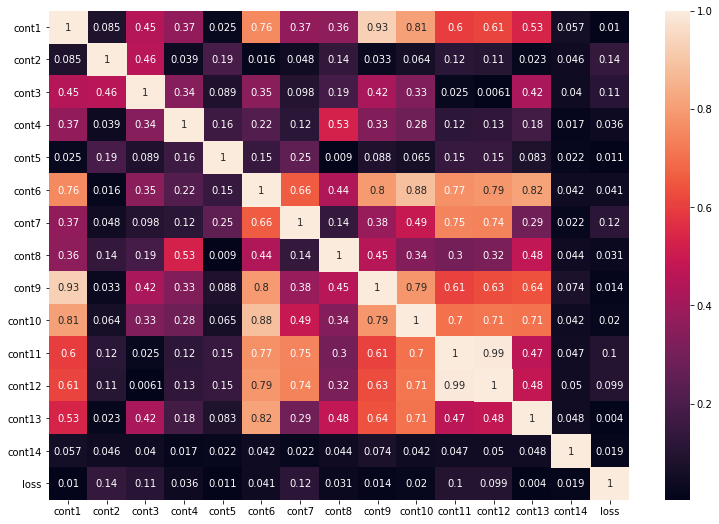

In [19]:
correlationMatrix = df_insurance[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

### 3.3)-Analysis of dep. feature i.e loss

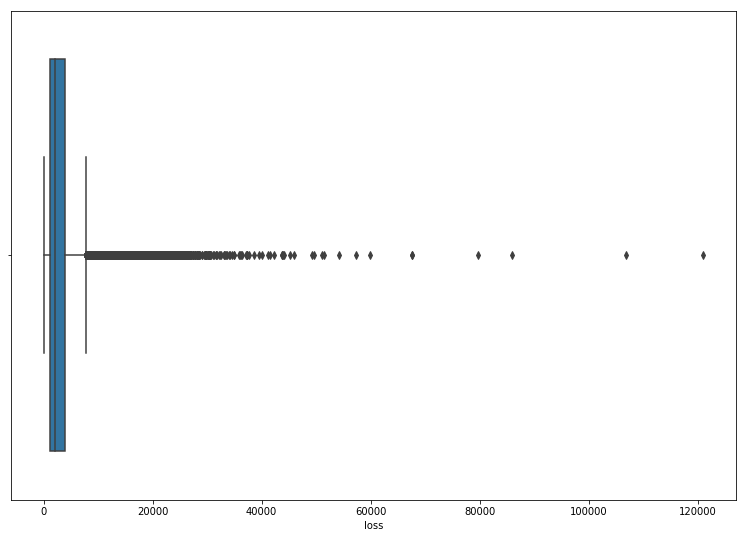

In [20]:
# making boxplot to seee how data is spread
plt.figure(figsize=(13,9))
sns.boxplot(df_insurance["loss"])

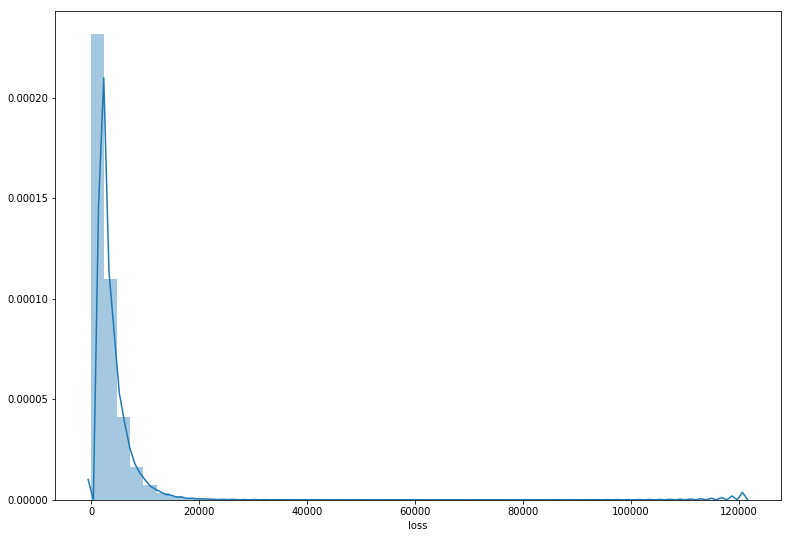

In [21]:
# distplot

plt.figure(figsize=(13,9))
sns.distplot(df_insurance["loss"])

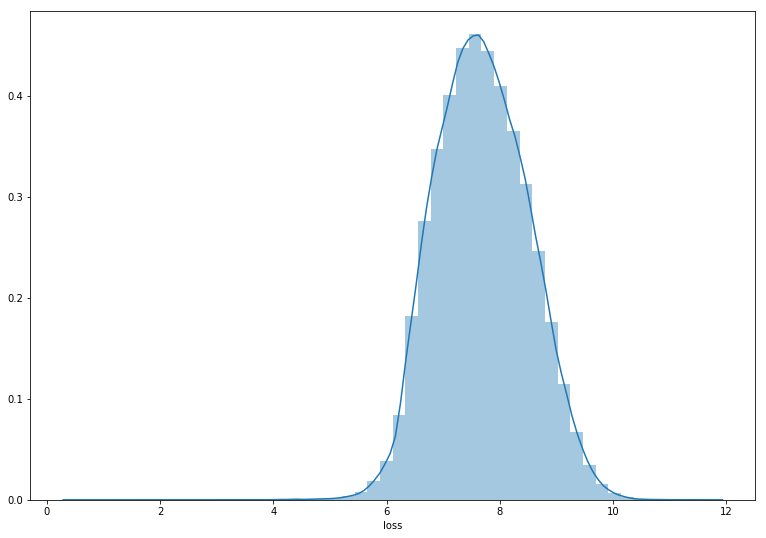

In [22]:
# making dist. plot with log to counter this spread of data

plt.figure(figsize=(13,9))
sns.distplot(np.log1p(df_insurance["loss"]))

Much better ! 

got normal distribution by applying logarithm on loss function

### 3.4)- Checking total categories in data

In [23]:
catCount = sum(str(x).isalpha() for x in df_insurance.iloc[1,:])
print("Number of categories: ",catCount)

Number of categories:  116


In [0]:
catFeatureslist = []
for colName,x in df_insurance.iloc[1,:].iteritems():
    #print(x)
    if(str(x).isalpha()):
        catFeatureslist.append(colName)

In [29]:
# unique values

print(df_insurance[catFeatureslist].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12       2
cat13       2
cat14       2
cat15       2
cat16       2
cat17       2
cat18       2
cat19       2
cat20       2
cat21       2
cat22       2
cat23       2
cat24       2
cat25       2
cat26       2
cat27       2
cat28       2
cat29       2
cat30       2
         ... 
cat87       4
cat88       4
cat89       8
cat90       7
cat91       8
cat92       7
cat93       5
cat94       7
cat95       5
cat96       8
cat97       7
cat98       5
cat99      16
cat100     15
cat101     19
cat102      9
cat103     13
cat104     17
cat105     20
cat106     17
cat107     20
cat108     11
cat109     84
cat110    131
cat111     16
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64


### 3.5) Encoding categorical features
Convert categorical string values to numeric values

In [0]:
from sklearn.preprocessing import LabelEncoder

for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(df_insurance[cf1].unique())
    df_insurance[cf1] = le.transform(df_insurance[cf1])

In [33]:
df_insurance.shape

(188318, 132)

In [34]:
df_insurance.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### 3.6)-Analyzing feature categories and their level

i.e level 2 
- levl 5 or more . It shows how many classes are their in that specific feature

In [35]:
sum(df_insurance[catFeatureslist].apply(pd.Series.nunique) > 2)

44

In [0]:
#  levels between 5-10

filterG5_10 = list((df_insurance[catFeatureslist].apply(pd.Series.nunique) > 5) & 
                (df_insurance[catFeatureslist].apply(pd.Series.nunique) < 10))

In [0]:
catFeaturesG5_10List = [i for (i, v) in zip(catFeatureslist, filterG5_10) if v]

In [38]:
len(catFeaturesG5_10List)

8

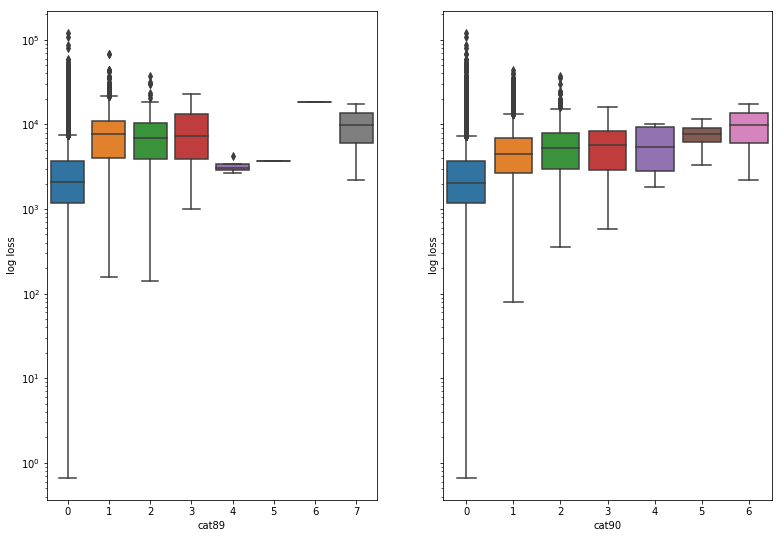

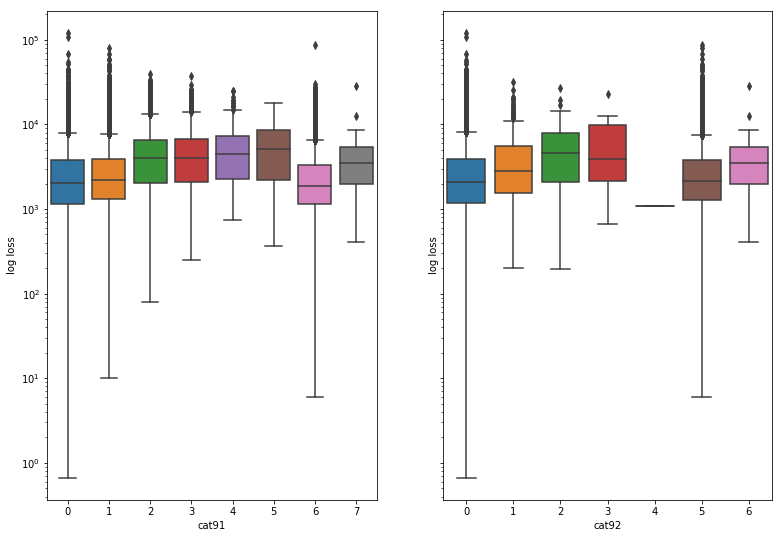

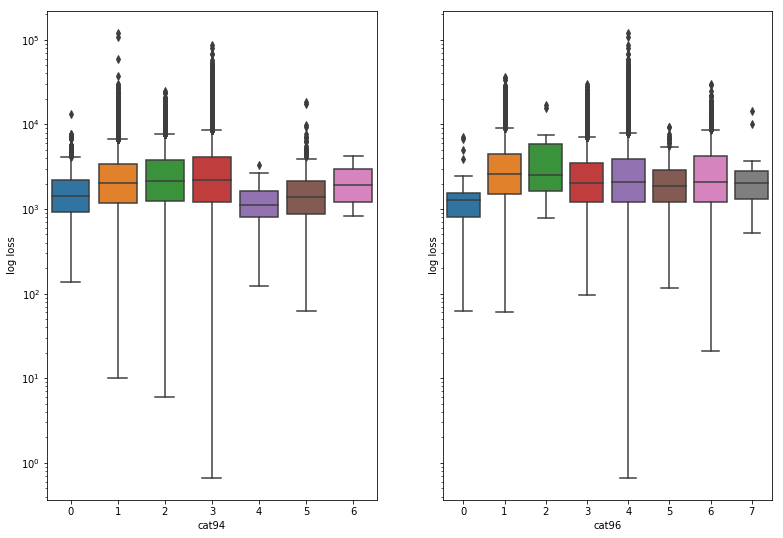

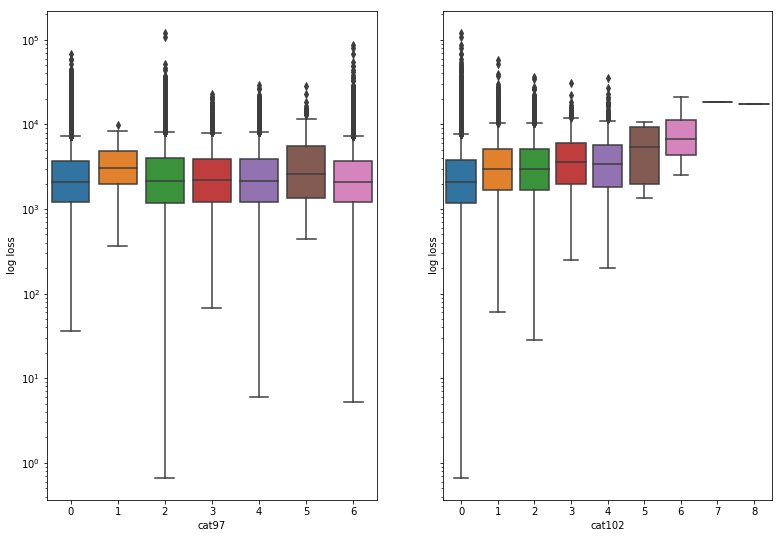

In [40]:
ncol = 2
nrow = 4
try:
    for rowIndex in range(nrow):
        f,axList = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(13, 9))
        features = catFeaturesG5_10List[rowIndex*ncol:ncol*(rowIndex+1)]
        
        for axIndex in range(len(axList)):
            sns.boxplot(x=features[axIndex], y="loss", data=df_insurance, ax=axList[axIndex])
                        
            # With original scale it is hard to visualize because of outliers
            axList[axIndex].set(yscale="log")
            axList[axIndex].set(xlabel=features[axIndex], ylabel='log loss')
except IndexError:
    print("")

### 3.7)-Correlation between categorical variables

w.r.t loss

In [0]:
filterG2 = list((df_insurance[catFeatureslist].apply(pd.Series.nunique) == 2))
catFeaturesG2List = [i for (i, v) in zip(catFeatureslist, filterG2) if v]
catFeaturesG2List.append("loss")

In [43]:
corrCatMatrix = df_insurance[catFeaturesG2List].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries= s.sort_values(kind="quicksort",ascending=False)

print("Top 5 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:9])

Top 5 most correlated categorical feature pairs: 

cat2   cat9     0.932420
cat9   cat2     0.932420
cat50  cat6     0.925731
cat6   cat50    0.925731
cat8   cat66    0.862231
cat66  cat8     0.862231
cat57  cat7     0.809418
cat7   cat57    0.809418
cat3   cat16    0.783480
dtype: float64
